# Computational Methods **Lab#1**
## ***Iterative method** for solving nonlinear equations*

### Idea of the method
The idea of the method is to find the root of the equation $f(x)=0$ by constructing a sequence of approximations $x_0, x_1, x_2, \dots$ that converges to the root of the equation. The sequence is constructed by the following formula:
$$x_{n+1} = \varphi(x_n), \quad n=0,1,2,\dots$$
where $\varphi(x)$ is an **iteration function**.
<br>
<br>
Method takes an initial approximation $x_0$ and calculates the next approximation $x_1=\varphi(x_0)$. Then it calculates $x_2=\varphi(x_1)$ and so on. The method stops when $|x_{n+1}-x_n|<\varepsilon$, where $\varepsilon$ is a given accuracy.

Let's find the iteration function $\varphi(x_n)$ for the equation $f(x)=0$:
<br>Tangent line to the graph of $f(x)$ at the point $(x_n, f(x_n))$ has the equation:
$$y=f(x_n)+f'(x_n)(x-x_n)$$
we will mark as follows:
$$y=f(x_{n-1})+f'(x_{n-1})(x_n-x_{n-1})$$
Then the intersection point of the tangent line with the $x$-axis has the coordinates $(x_n, 0)$, so we have:
$$0=f(x_{n-1})+f'(x_{n-1})(x_n-x_{n-1})$$
and after some transformations we get:
$$x_n=x_{n-1}-\frac{f(x_{n-1})}{f'(x_{n-1})}$$

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

In [3]:
def parse_expression(expression_str, variable):
    """
    Parse an expression from a string to a Python function.

    Parameters
    ----------
    expression_str: str
        The mathematical expression as a string.
    variable: str
        The variable in the expression.

    Returns:
    - A Python function representing the parsed expression.
    """
    x = sp.symbols(variable)
    parsed_expr = sp.sympify(expression_str)
    func = sp.lambdify(x, parsed_expr, 'numpy')
    return func

In [4]:
def visualize(f, tangent, x, a, b):
    """
    Visualize the function and the tangent line at the given point.

    Parameters
    ----------
    f: function
        The function to visualize.
    tangent: function
        The tangent line to visualize.
    x: float
        The point at which the tangent line is drawn.
    a: float
        The left boundary of the plot.
    b: float
        The right boundary of the plot.
    """
    x_space = np.linspace(a-10, b+10, 1000)
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    # Move left y-axis and bottom x-axis to centre, passing through (0,0)
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')

    # Eliminate upper and right axes
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')

    # Show ticks in the left and lower axes only
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    m = max(abs(a), abs(b))
    ax.set_ylim(ymin=-m, ymax=m)
    ax.set_xlim(xmin=-m, xmax=m)

    ax.plot(x_space, f(x_space), color='blue')

    # Plot tangent line
    ax.plot(x_space, tangent(x_space), color='red')

    # Plot tangent point (last point in the iteration)
    ax.scatter(x[-1], tangent(x[-1]), color='red')

    # Plot every approximation point
    ax.scatter(x, np.zeros(len(x)), color='green')

    # Annotate the approximation points
    for i in range(len(x)):
        ax.annotate(f'$x_{i+1}$', (x[i], 0), xytext=(x[i] + 0.1, 0.1))

    plt.show()

    

In [24]:

def compute_iteration(f, df, a, b, aprox=1, epsilon=1e-7, max_iter=100):
    """
    Realization of the iteration method for solving nonlinear equations on the segment [a, b]

    Parameters
    ----------
    f : str
        Function to solve
    df : str
        Derivative of the function
    a : float
        Left border of the segment
    b : float
        Right border of the segment
    epsilon : float, optional
        Accuracy of the solution

    Returns
    -------
    x : float
        Approximate solution of the equation
    """

    iter = 0

    #parse the function and its derivative
    f = parse_expression(f, 'x')
    df = parse_expression(df, 'x')

    #the initial approximation
    x_approx = aprox
    if df(x_approx) == 0:
        raise ValueError("The derivative of the function is zero at the initial point, division by zero")

    #list of approximations
    x_list = [x_approx]

    tangent = lambda x: df(x_approx) * (x - x_approx) + f(x_approx)
    visualize(f, tangent, x_list, a, b)

    while abs(float(f(x_approx))) > epsilon:
        x_approx = x_approx - f(x_approx) / df(x_approx)

        if x_approx < a:
            x_approx = a
        elif x_approx > b:
            x_approx = b

        x_list.append(x_approx)
        #save tangent for visualization
        tangent = lambda x: df(x_approx) * (x - x_approx) + f(x_approx)

        iter += 1

        visualize(f, tangent, x_list, a, b)

        if iter > max_iter:
            raise RuntimeError("The number of iterations exceeded the maximum")
    return x_approx


<lambdifygenerated-39>:2: RuntimeWarning: invalid value encountered in log
  return log(x)


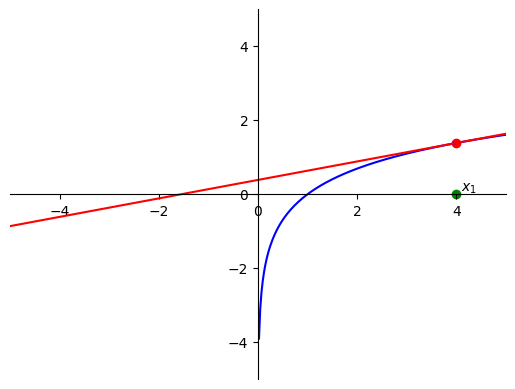

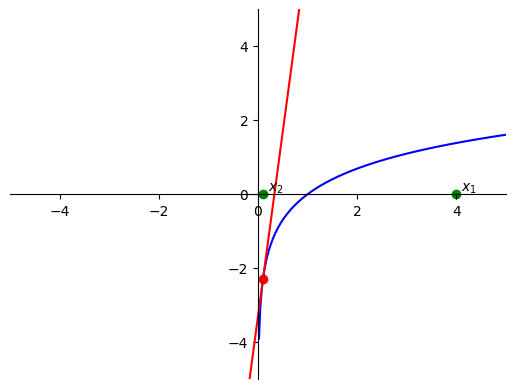

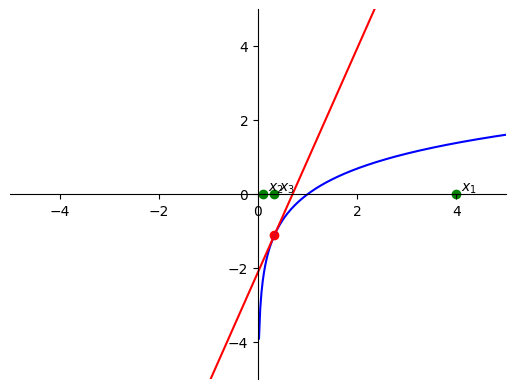

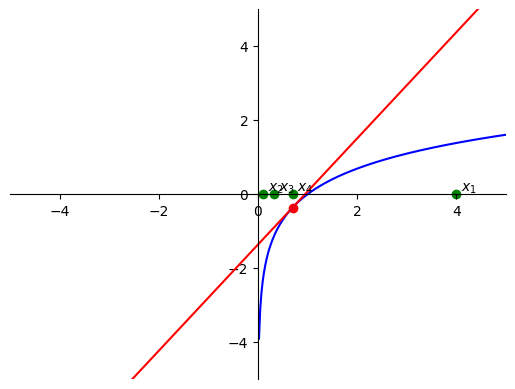

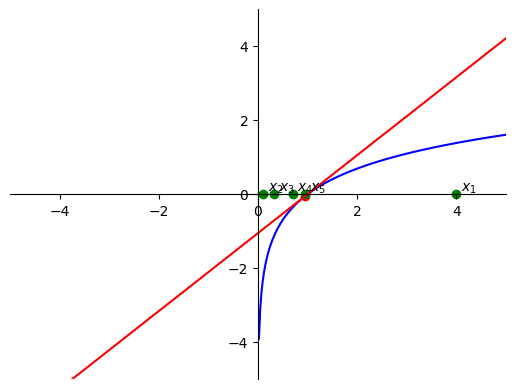

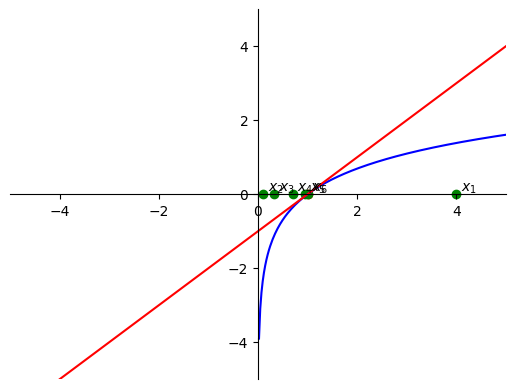

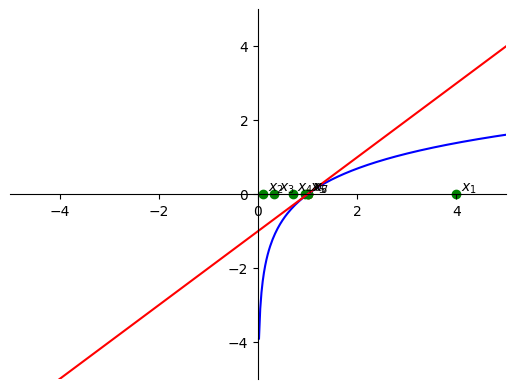

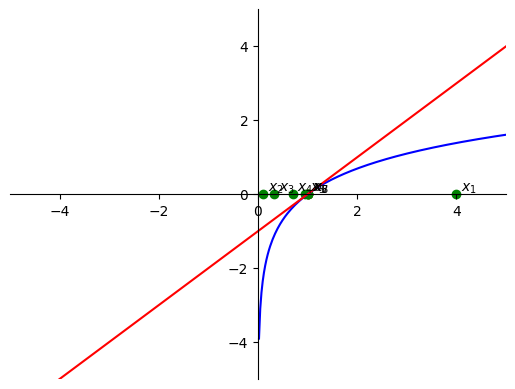

0.999999999999571


In [29]:
#test1
print(compute_iteration("log(x)", "1/x",0.1, 5, aprox=4))

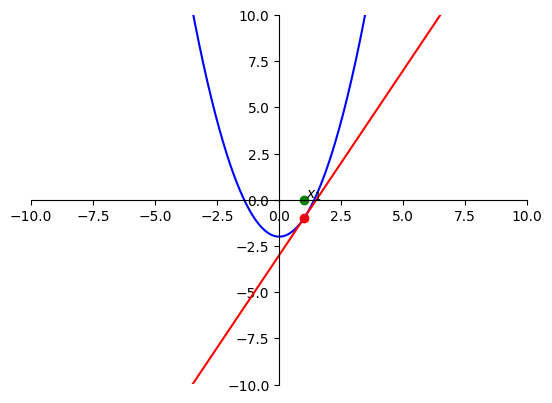

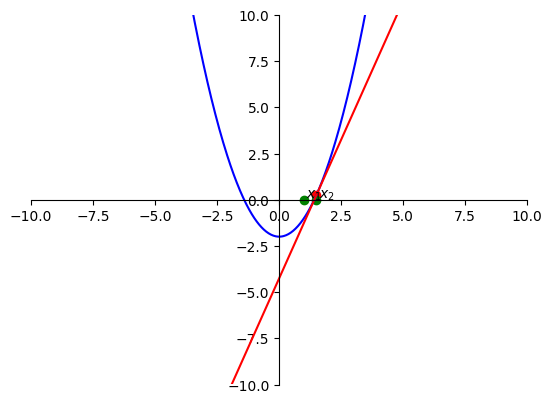

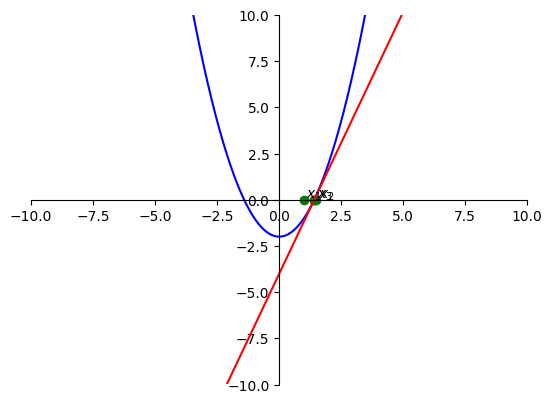

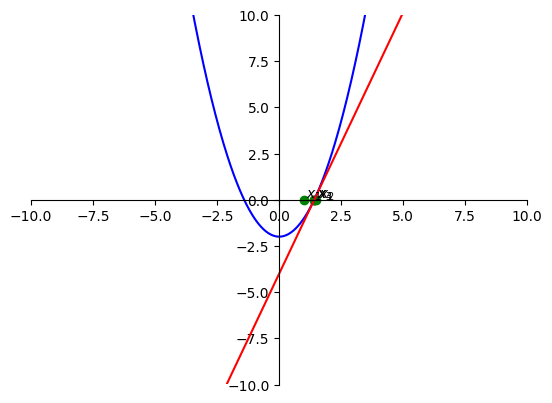

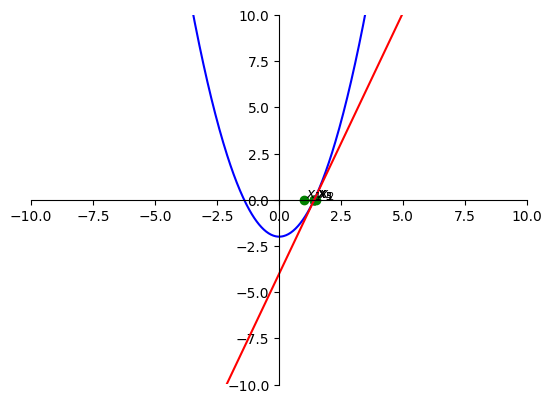

1.4142135623746899


In [13]:
#test2
print(compute_iteration("x**2 - 2", "2*x", -10, 2))

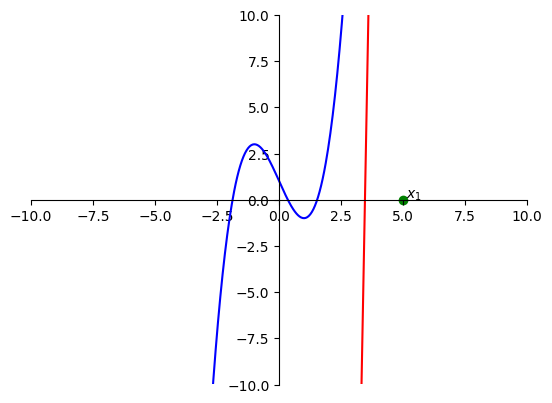

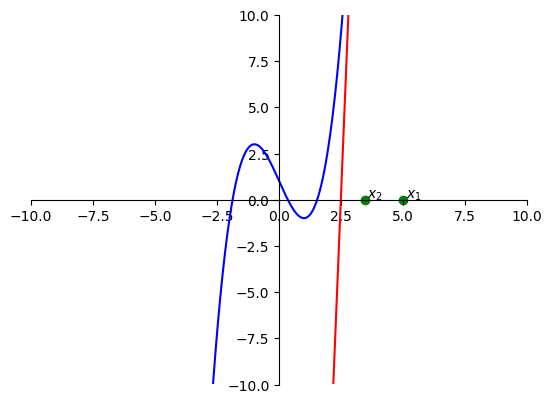

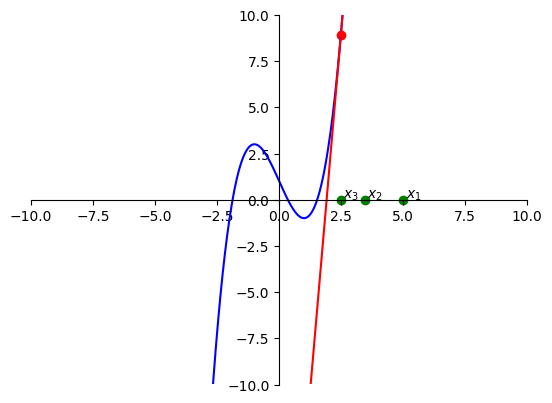

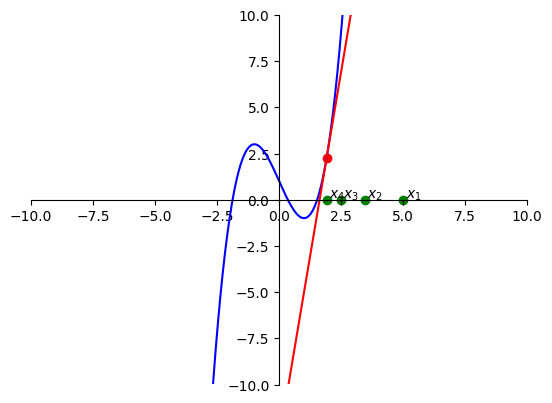

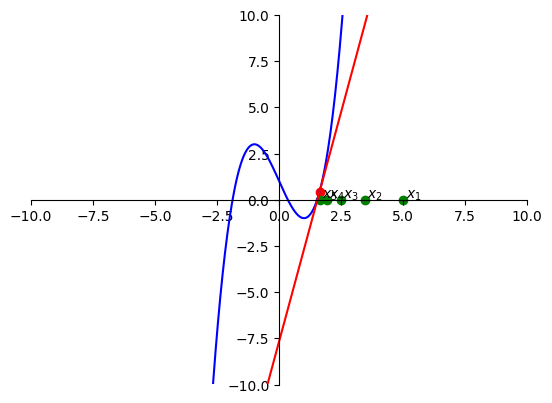

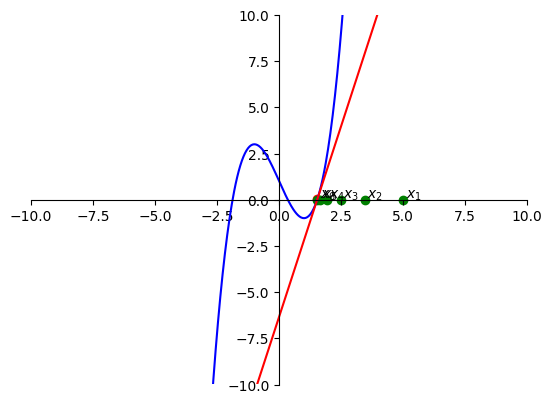

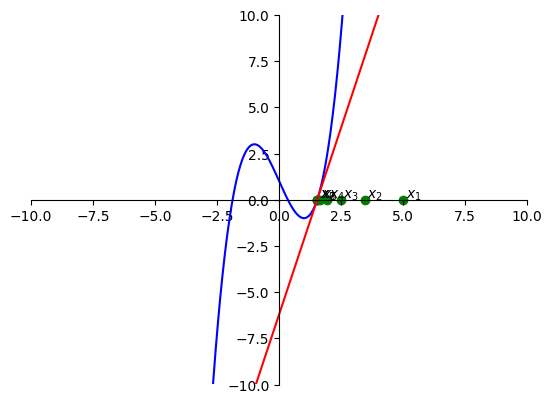

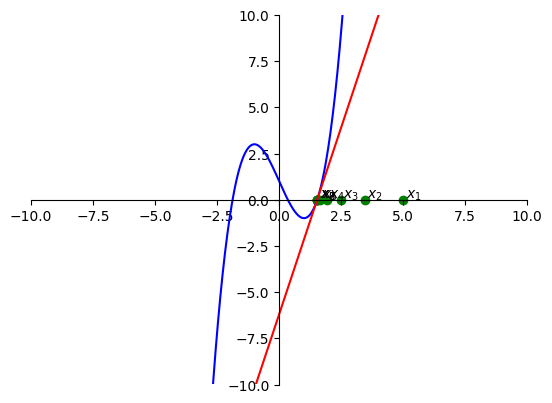

1.532088896139217


In [14]:
#test3
print(compute_iteration("x**3 - 3*x + 1", "3*x**2 - 3", -10, 1, aprox=5))

<lambdifygenerated-37>:2: RuntimeWarning: invalid value encountered in log
  return x**3 + log(x)


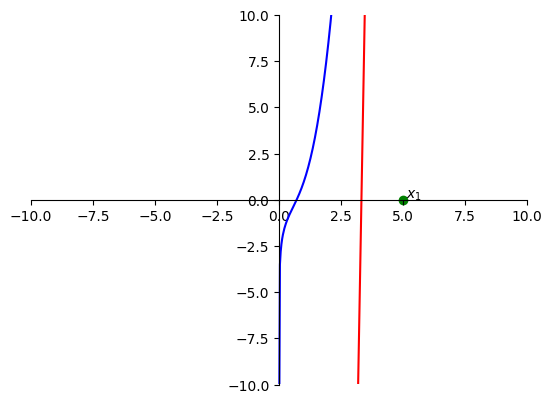

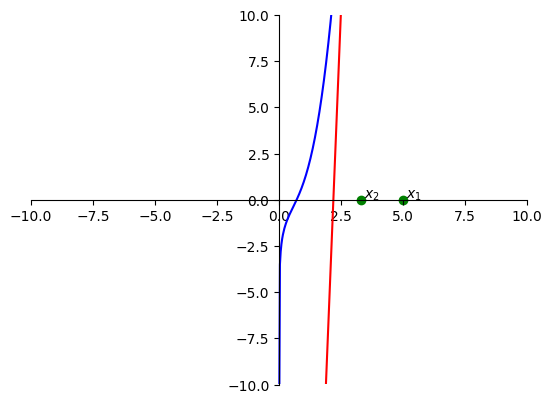

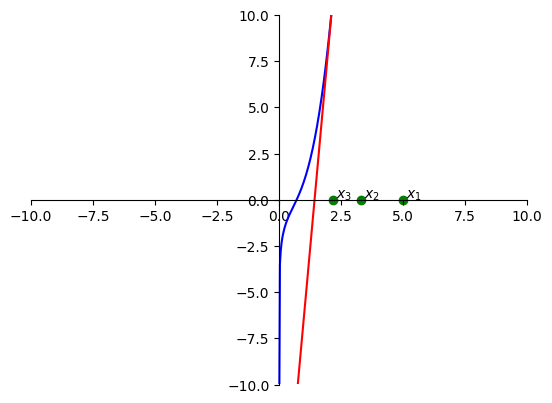

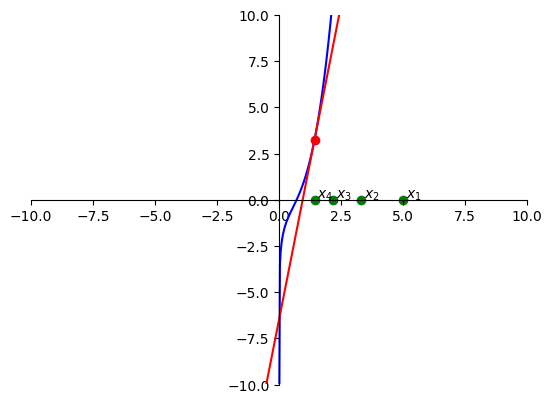

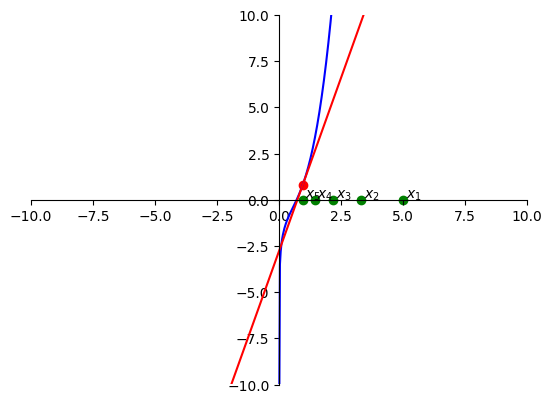

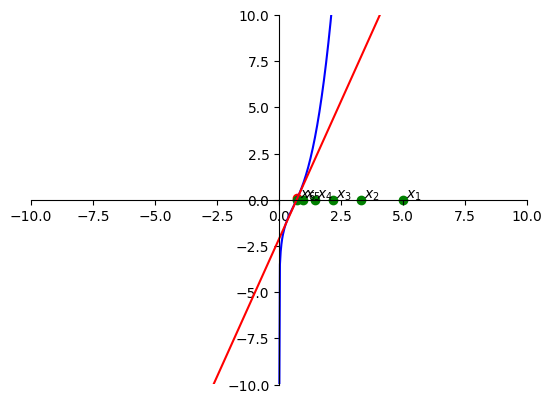

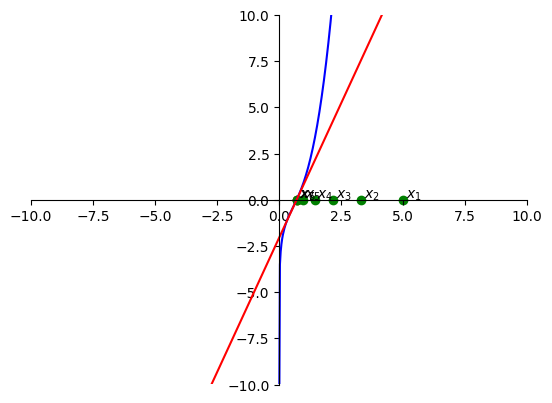

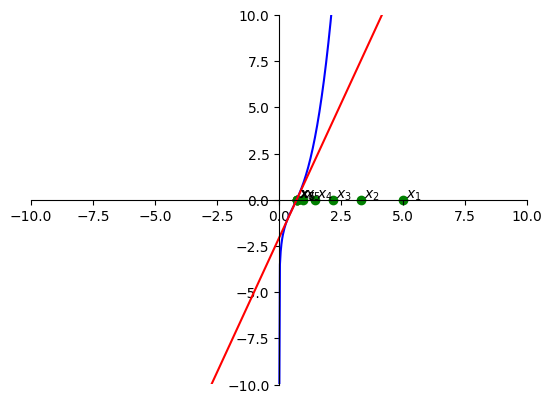

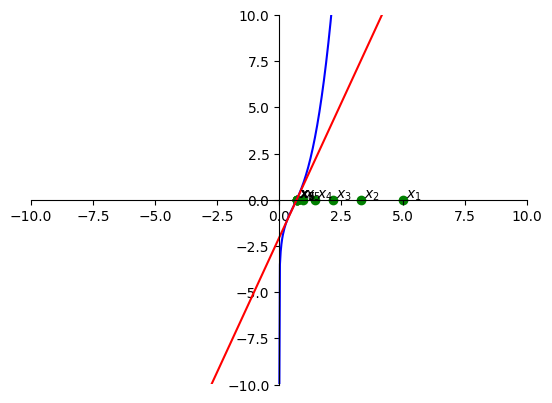

0.7047094902549138


In [28]:
#test4
print(compute_iteration("log(x) + x**3", "1/x + 3*x**2", 0.00001, 10, aprox=5))